In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
spark = SparkSession.builder.appName('youTube_data_analysis').getOrCreate()

In [ ]:
spark.config("spark.driver.memory", "8g")

AttributeError: 'SparkSession' object has no attribute 'config'

In [ ]:
spark

In [ ]:
df_pyspark=spark.read.csv('/content/US_youtube_trending_data_updated.csv',header=True,inferSchema=True)
df_pyspark.show()

+--------------------+--------------------+-------------------+--------------------+--------------+------------+-------------+--------------------+----------+--------------+--------------------+--------------------+--------------------+-----------------+----------------+--------------------+-------------+
|            video_id|               title|        publishedAt|          channel_Id| channel_Title| category_Id|trending_date|                tags|view_count|         likes|            dislikes|       comment_count|      thumbnail_link|comments_disabled|ratings_disabled|         description|category_name|
+--------------------+--------------------+-------------------+--------------------+--------------+------------+-------------+--------------------+----------+--------------+--------------------+--------------------+--------------------+-----------------+----------------+--------------------+-------------+
|         3C66w5Z0ixs|I ASKED HER TO BE...|2020-08-11 19:20:14|UCvtRTOMP2TqYqu5

In [ ]:
df_pyspark=spark.read.csv('/content/drive/MyDrive/bigdata/data/youtube_data/US_youtube_trending_data_updated.csv',header=True,inferSchema=True)
df_pyspark.show()

+--------------------+--------------------+-------------------+--------------------+--------------+------------+-------------+--------------------+----------+--------------+--------------------+--------------------+--------------------+-----------------+----------------+--------------------+-------------+
|            video_id|               title|        publishedAt|          channel_Id| channel_Title| category_Id|trending_date|                tags|view_count|         likes|            dislikes|       comment_count|      thumbnail_link|comments_disabled|ratings_disabled|         description|category_name|
+--------------------+--------------------+-------------------+--------------------+--------------+------------+-------------+--------------------+----------+--------------+--------------------+--------------------+--------------------+-----------------+----------------+--------------------+-------------+
|         3C66w5Z0ixs|I ASKED HER TO BE...|2020-08-11 19:20:14|UCvtRTOMP2TqYqu5

In [ ]:
df_pyspark.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publishedAt: string (nullable = true)
 |-- channel_Id: string (nullable = true)
 |-- channel_Title: string (nullable = true)
 |-- category_Id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- description: string (nullable = true)
 |-- category_name: string (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType
df_pyspark = df_pyspark.withColumn("category_Id", df_pyspark["category_Id"].cast(IntegerType()))
df_pyspark = df_pyspark.withColumn("view_count", df_pyspark["view_count"].cast(IntegerType()))
df_pyspark = df_pyspark.withColumn("likes", df_pyspark["likes"].cast(IntegerType()))
df_pyspark = df_pyspark.withColumn("dislikes", df_pyspark["dislikes"].cast(IntegerType()))
df_pyspark = df_pyspark.withColumn("comment_count", df_pyspark["comment_count"].cast(IntegerType()))

In [ ]:
df_pyspark=df_pyspark.drop('video_id','channel_Id','thumbnail_link','comments_disabled','ratings_disabled')
df_pyspark.show()

+--------------------+-------------------+--------------+-----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-------------+
|               title|        publishedAt| channel_Title|category_Id|trending_date|                tags|view_count| likes|dislikes|comment_count|         description|category_name|
+--------------------+-------------------+--------------+-----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-------------+
|I ASKED HER TO BE...|2020-08-11 19:20:14|      Brawadis|         22|   2020-08-12|brawadis|prank|ba...|   1514614|156908|    5855|        35313|SUBSCRIBE to BRAW...|         NULL|
|                NULL|               NULL|          NULL|       NULL|         NULL|                NULL|      NULL|  NULL|    NULL|         NULL|                NULL|         NULL|
|                NULL|               NULL|          NULL|       NULL|         NULL|            

In [ ]:
from pyspark.sql.functions import split, regexp_extract

df_pyspark = df_pyspark.withColumn("publishedAt_date", regexp_extract("publishedAt", "(.*?) ", 1)) \
                       .withColumn("publishedAt_time", regexp_extract("publishedAt", " (.*)", 1))

df_pyspark=df_pyspark.drop("publishedAt")

In [ ]:
df_pyspark.show()

+--------------------+--------------+-----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-------------+----------------+----------------+
|               title| channel_Title|category_Id|trending_date|                tags|view_count| likes|dislikes|comment_count|         description|category_name|publishedAt_date|publishedAt_time|
+--------------------+--------------+-----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-------------+----------------+----------------+
|I ASKED HER TO BE...|      Brawadis|         22|   2020-08-12|brawadis|prank|ba...|   1514614|156908|    5855|        35313|SUBSCRIBE to BRAW...|         NULL|      2020-08-11|        19:20:14|
|                NULL|          NULL|       NULL|         NULL|                NULL|      NULL|  NULL|    NULL|         NULL|                NULL|         NULL|            NULL|            NULL|
|                NULL|   

In [ ]:
df_pyspark = df_pyspark.na.drop()

In [ ]:
df_pyspark.show()

+--------------------+--------------------+-----------+-------------+--------------------+----------+------+--------+-------------+--------------------+--------------------+----------------+----------------+
|               title|       channel_Title|category_Id|trending_date|                tags|view_count| likes|dislikes|comment_count|         description|       category_name|publishedAt_date|publishedAt_time|
+--------------------+--------------------+-----------+-------------+--------------------+----------+------+--------+-------------+--------------------+--------------------+----------------+----------------+
|Apex Legends | St...|        Apex Legends|         20|   2020-08-12|Apex Legends|Apex...|   2381688|146739|    2794|        16549|While running her...|              Gaming|      2020-08-11|        17:00:10|
|I left youtube fo...|       jacksepticeye|         24|   2020-08-12|jacksepticeye|fun...|   2038853|353787|    2628|        40221|I left youtube fo...|       Entertain

In [ ]:
df_pyspark.collect()[10]

Row(title='Lil Yachty & Future - Pardon Me (Official Video)', channel_Title='LilYachtyVEVO', category_Id=10, trending_date='2020-08-12', tags='Lil Yachty|Lil Boat 3|Future Lil Yachty|Pardon Me Future|Pardon Me Lil Yachty|Lil Yachty future pardon me', view_count=413372, likes=26440, dislikes=293, comment_count=1495, description="Watch the official video for Lil Yachty & Future's Pardon Me.Get Lil Yachty's new album Lil Boat 3 here: https://QualityControl.lnk.to/LilBoat3Get Lil Boat 3 merch here: https://QualityControl.lnk.to/LilBoat...Watch Lil Yachty's reality show The Boat Show: https://QualityControl.lnk.to/BoatShowYDFollow Lil Yachty On All Socials: https://www.instagram.com/lilyachty/https://twitter.com/lilyachtyhttps://www.facebook.com/lilyachtysai...Text Yachty At: 404-905-1605Pardon Me lyrics:[Chorus: Future]Pardon me, I been actin' lil' poorPardon me, I been still actin' poorPardon me, I\u2005been\u2005actin' lil' poorPardon\u2005me, I been still actin' poor\u2005(EarDrummers)P

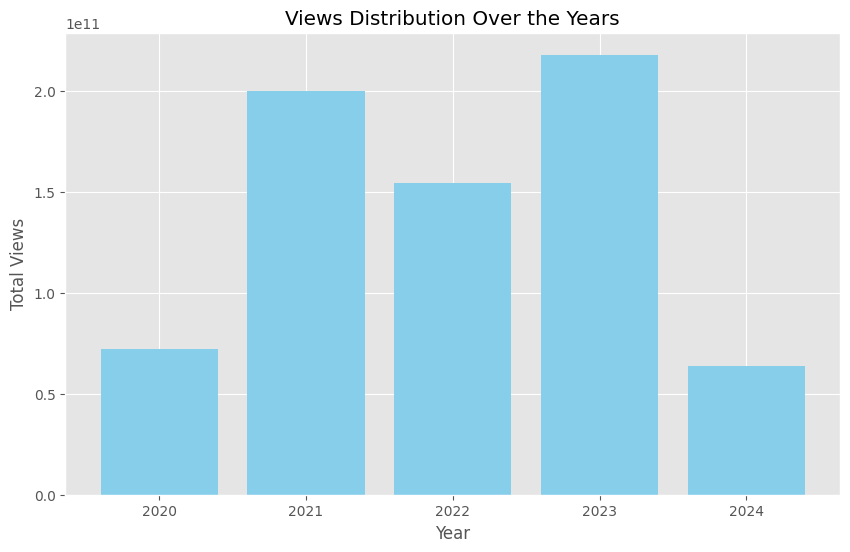

The year with the highest views is 2023 with 217790512124 views.


In [ ]:
from pyspark.sql.functions import year, col, sum as _sum
plt.style.use("ggplot")
df_pyspark = df_pyspark.withColumn("year", year(col("publishedAt_date")))
views_per_year = df_pyspark.groupBy("year").agg(_sum("view_count").alias("total_views"))
max_views_year = views_per_year.orderBy(col("total_views").desc()).limit(1).collect()
views_per_year_pd = views_per_year.orderBy("year").toPandas()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(views_per_year_pd["year"], views_per_year_pd["total_views"], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Views")
plt.title("Views Distribution Over the Years")
plt.show()
print(f"The year with the highest views is {max_views_year[0]['year']} with {max_views_year[0]['total_views']} views.")

In [ ]:
category_count = df_pyspark.groupBy("category_name").agg(count("*").alias("total_count"))
sorted_category_count = category_count.orderBy(col("total_count").desc())
sorted_category_count.show()

+--------------------+-----------+
|       category_name|total_count|
+--------------------+-----------+
|              Gaming|      51712|
|       Entertainment|      50470|
|               Music|      41640|
|              Sports|      28449|
|      People & Blogs|      21875|
|              Comedy|      12401|
|    Film & Animation|      10180|
|     News & Politics|       9067|
|Science & Technology|       7659|
|       Howto & Style|       6684|
|           Education|       6248|
|    Autos & Vehicles|       5396|
|     Travel & Events|       1674|
|      Pets & Animals|       1042|
|Nonprofits & Acti...|        106|
+--------------------+-----------+



In [ ]:
common_categories_3 = sorted_category_count.limit(3)
common_categories_3.show()

+-------------+-----------+
|category_name|total_count|
+-------------+-----------+
|       Gaming|      51712|
|Entertainment|      50470|
|        Music|      41640|
+-------------+-----------+



In [ ]:
total_count = sorted_category_count.select(_sum("total_count")).collect()[0][0]
top_3_categories = sorted_category_count.limit(3).collect()
ratios = {}
for category_row in top_3_categories:
    category_name = category_row["category_name"]
    if category_name in ["Entertainment", "Gaming", "Music"]:
        ratios[category_name] = (category_row["total_count"] / total_count) * 100

Entertainment_ratio = ratios.get("Entertainment", 0)
Gaming_ratio = ratios.get("Gaming", 0)
Music_ratio = ratios.get("Music", 0)

Entertainment_ratio, Gaming_ratio, Music_ratio

(19.8230185818706, 20.310836871521545, 16.354874058828845)

In [ ]:
total_percentage = Entertainment_ratio + Gaming_ratio + Music_ratio
print(total_percentage)


56.488729512220985


The most common categories are Gaming(20.31), Entertainment(19.82%), Music(16.35%) making (56.48%) of the categories of the trending videos

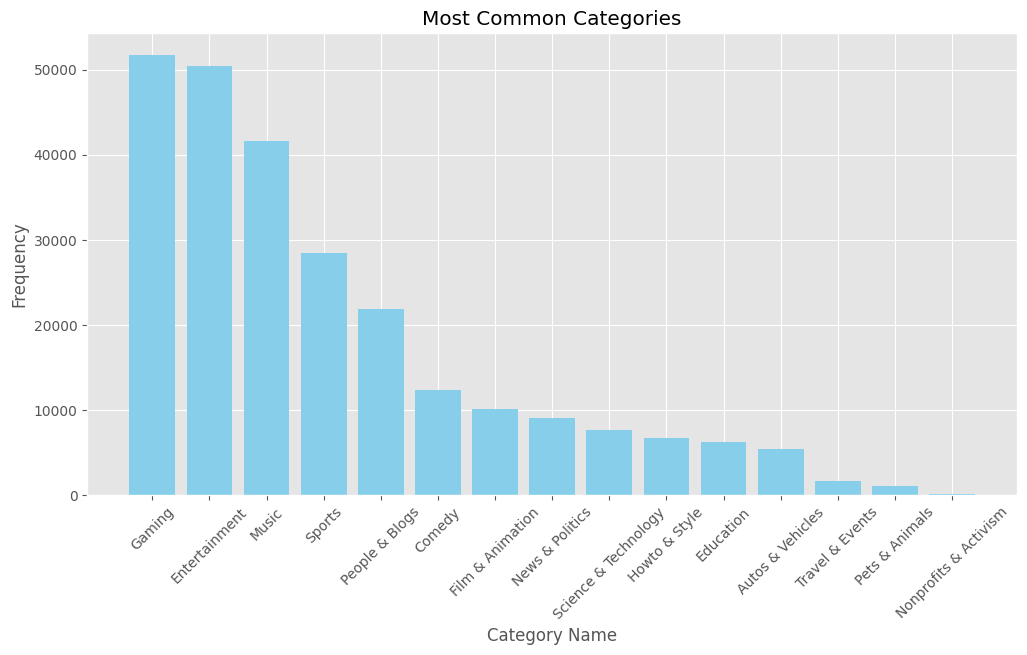

In [ ]:
top_categories_pd = sorted_category_count.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(top_categories_pd['category_name'], top_categories_pd['total_count'], color='skyblue')
plt.xlabel("Category Name")
plt.ylabel("Frequency")
plt.title("Most Common Categories")
plt.xticks(rotation=45)
plt.show()

In [ ]:
channel_views = df_pyspark.groupBy(["category_name", "channel_title"]) \
    .agg(max("view_count").alias("max_view_count")) \
    .orderBy(col("max_view_count").desc())

channel_views.show()

+-------------+--------------------+--------------+
|category_name|       channel_title|max_view_count|
+-------------+--------------------+--------------+
|Entertainment|             Discord|    1407643634|
|        Music|           BLACKPINK|     277791741|
|        Music|         HYBE LABELS|     264407389|
|        Music|      Big Hit Labels|     232649205|
|Entertainment|              FFUNTV|     206202284|
|Entertainment|             MrBeast|     169649341|
|       Gaming|      Rockstar Games|     166323421|
|Entertainment|     Fortnite Fun TV|     160111863|
|Entertainment|            Bizarrap|     158477831|
|    Education| CHANDAN ART ACADEMY|     149615603|
|        Music|           AdeleVEVO|     139547582|
|        Music|          KarolGVEVO|     138548083|
|Entertainment|          Dan Rhodes|     127913129|
|Entertainment|       Hombale Films|     116910737|
|       Sports|                 NFL|     113116792|
|Entertainment| Mythri Movie Makers|     112497953|
|        Mus

In [ ]:
channel_views = df_pyspark.groupBy(["category_name", "channel_title"]) \
    .agg(sum("view_count").alias("max_view_count")) \
    .orderBy(col("max_view_count").desc())

channel_views.show()

+---------------+--------------------+--------------+
|  category_name|       channel_title|max_view_count|
+---------------+--------------------+--------------+
|  Entertainment|             MrBeast|   87363777714|
|          Music|           BLACKPINK|   18292891688|
|          Music|         HYBE LABELS|   13456202130|
|  Entertainment|        DaFuq!?Boom!|   10218551899|
|         Sports|                 NFL|    9630102055|
|          Music|   JYP Entertainment|    8307711437|
|          Music|              SMTOWN|    8099969838|
|  Entertainment|Marvel Entertainment|    6291661205|
|         Gaming|      Rockstar Games|    5564810487|
|         Gaming|      MrBeast Gaming|    5433951305|
|  Entertainment|              FFUNTV|    5030654339|
|  Entertainment|Sony Pictures Ent...|    4656184258|
|         Sports|        Dude Perfect|    4442298545|
|          Music|           BANGTANTV|    4354122069|
|  Entertainment|America's Got Talent|    4258690342|
|  Entertainment|           

In [ ]:
from pyspark.sql.functions import lit
top_10_channels = channel_views.limit(10)
top_10_channels.show()
top_10_channels = top_10_channels.withColumn("max_view_count", col("max_view_count") / lit(1000000000))
top_10_channels.show()

+-------------+--------------------+--------------+
|category_name|       channel_title|max_view_count|
+-------------+--------------------+--------------+
|Entertainment|             MrBeast|   87363777714|
|        Music|           BLACKPINK|   18292891688|
|        Music|         HYBE LABELS|   13456202130|
|Entertainment|        DaFuq!?Boom!|   10218551899|
|       Sports|                 NFL|    9630102055|
|        Music|   JYP Entertainment|    8307711437|
|        Music|              SMTOWN|    8099969838|
|Entertainment|Marvel Entertainment|    6291661205|
|       Gaming|      Rockstar Games|    5564810487|
|       Gaming|      MrBeast Gaming|    5433951305|
+-------------+--------------------+--------------+

+-------------+--------------------+--------------+
|category_name|       channel_title|max_view_count|
+-------------+--------------------+--------------+
|Entertainment|             MrBeast|  87.363777714|
|        Music|           BLACKPINK|  18.292891688|
|        Mu

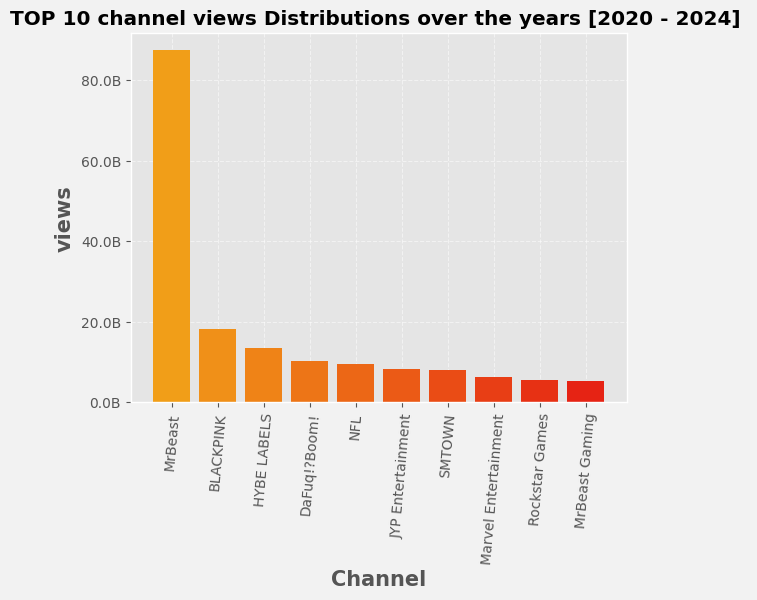

In [ ]:
colors = ["#F19E18","#F09018","#EF8317","#ED7517","#EC6716","#EB5A16","#EA4C15","#E83E15","#E73114","#E62314"]
fig, ax = plt.subplots()
fig.patch.set_facecolor("#F2F2F2")
top_10_channels_pd = top_10_channels.toPandas()
channel_titles = top_10_channels_pd['channel_title'].tolist()
ax.set_xticks(range(len(channel_titles)))
ax.set_xticklabels(channel_titles, rotation=85)
ax.bar(range(len(channel_titles)), top_10_channels_pd['max_view_count'], color=colors)
ax.grid(linestyle = "--", alpha = 0.5)
ax.set_xlabel("Channel", size = 15, fontweight = "bold")
ax.set_ylabel("views", size = 15, fontweight = "bold")
ax.set_title("TOP 10 channel views Distributions over the years [2020 - 2024] ", fontweight = "bold")
ax.yaxis.set_major_formatter('{x:,}B')
plt.show()

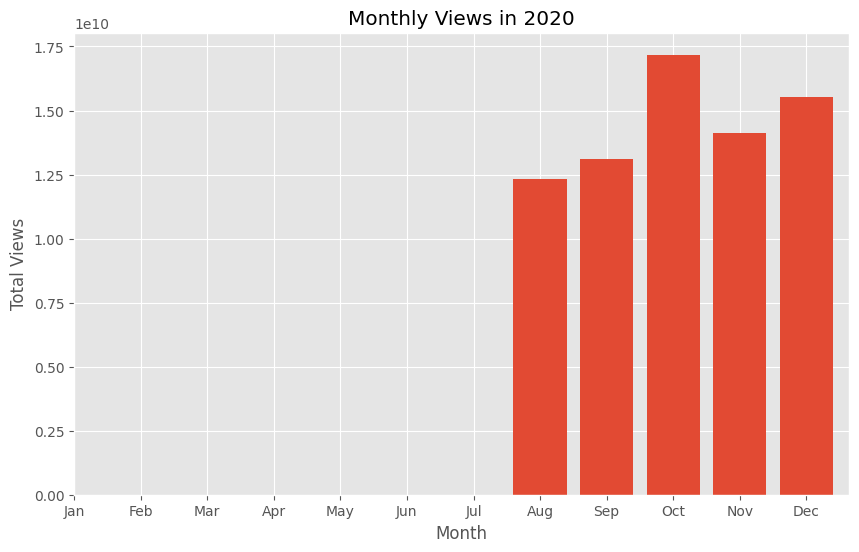

In [ ]:
from pyspark.sql.functions import sum, to_date, year, month
df_pyspark = df_pyspark.withColumn("publishedAt_date", to_date("publishedAt_date", "yyyy-MM-dd")) \
                          .withColumn("year", year("publishedAt_date")) \
                          .withColumn("month", month("publishedAt_date"))
df_2020 = df_pyspark.filter(df_pyspark["year"] == 2020)
monthly_views_2020 = df_2020.groupBy("month").agg(sum("view_count").alias("total_views"))
pandas_df_2020 = monthly_views_2020.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(pandas_df_2020['month'], pandas_df_2020['total_views'])
plt.title('Monthly Views in 2020')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

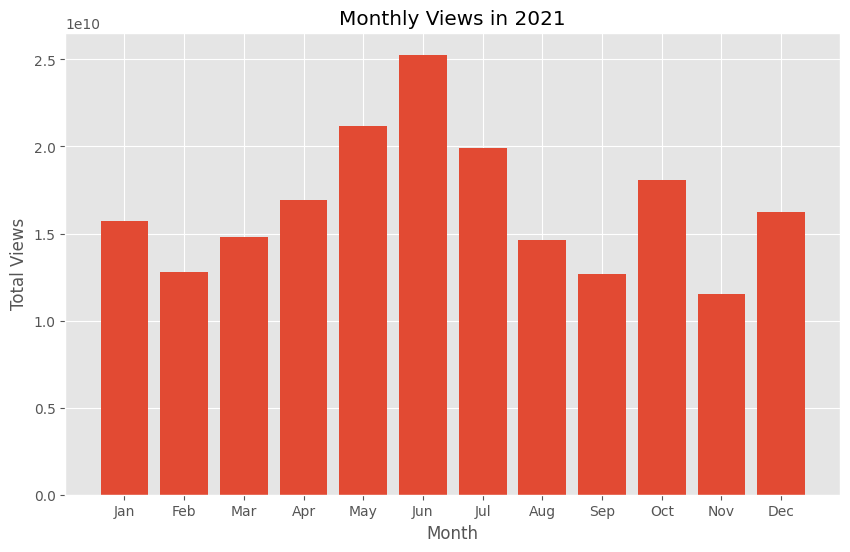

In [ ]:
from pyspark.sql.functions import sum, to_date, year, month
df_pyspark = df_pyspark.withColumn("publishedAt_date", to_date("publishedAt_date", "yyyy-MM-dd")) \
                          .withColumn("year", year("publishedAt_date")) \
                          .withColumn("month", month("publishedAt_date"))
df_2021 = df_pyspark.filter(df_pyspark["year"] == 2021)
monthly_views_2021 = df_2021.groupBy("month").agg(sum("view_count").alias("total_views"))
pandas_df_2021 = monthly_views_2021.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(pandas_df_2021['month'], pandas_df_2021['total_views'])
plt.title('Monthly Views in 2021')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

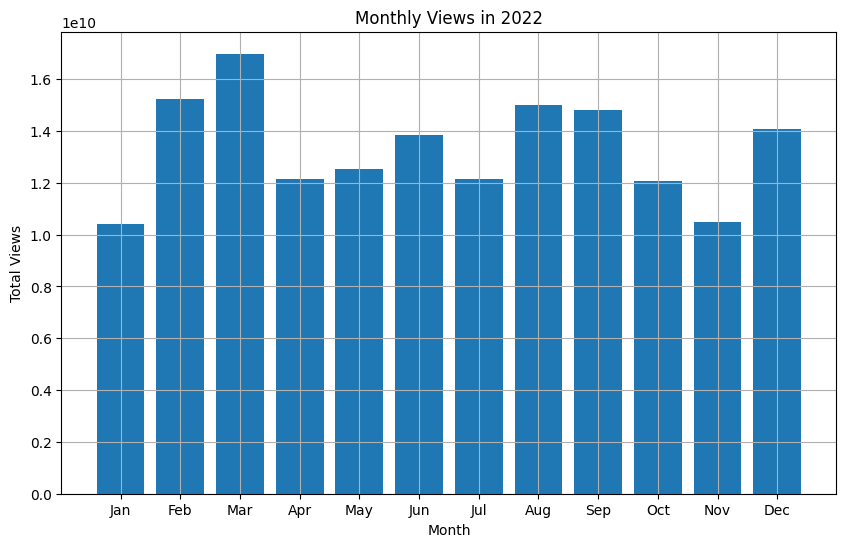

In [ ]:
from pyspark.sql.functions import sum, to_date, year, month
df_pyspark = df_pyspark.withColumn("publishedAt_date", to_date("publishedAt_date", "yyyy-MM-dd")) \
                          .withColumn("year", year("publishedAt_date")) \
                          .withColumn("month", month("publishedAt_date"))
df_2022 = df_pyspark.filter(df_pyspark["year"] == 2022)
monthly_views_2022 = df_2022.groupBy("month").agg(sum("view_count").alias("total_views"))
pandas_df_2022 = monthly_views_2022.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(pandas_df_2022['month'], pandas_df_2022['total_views'])
plt.title('Monthly Views in 2022')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Number of days from upload to trending

In [ ]:
from pyspark.sql.functions import to_date, datediff

# Assuming 'trending_date' and 'publishedAt_date' are in "YYYY-MM-DD" format
df_pyspark = df_pyspark.withColumn("trending_date", to_date("trending_date", "yyyy-MM-dd")) \
                       .withColumn("publishedAt_date", to_date("publishedAt_date", "yyyy-MM-dd")) \
                       .withColumn("days_diff", datediff("trending_date", "publishedAt_date"))

In [ ]:
video_counts = df_pyspark.groupBy("days_diff").agg(count("*").alias("video_count")).orderBy("days_diff")

In [ ]:
video_counts_pd = video_counts.toPandas()

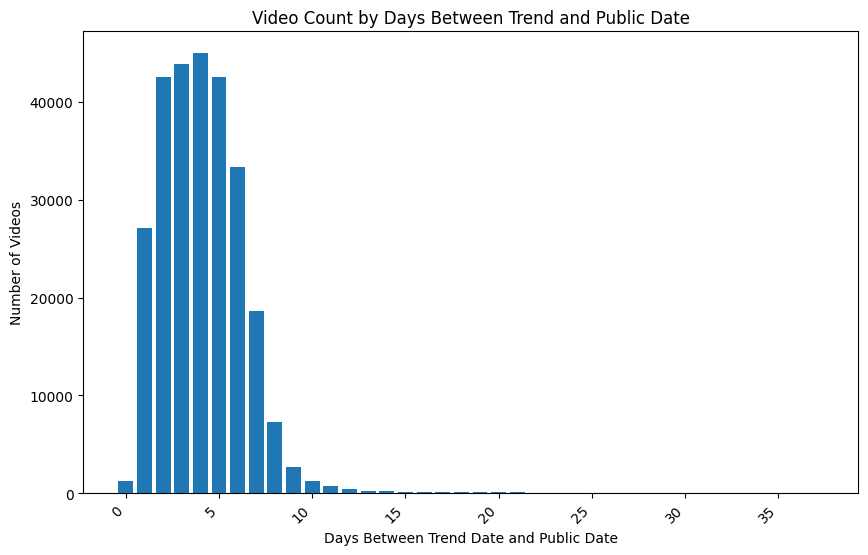

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(video_counts_pd["days_diff"], video_counts_pd["video_count"])
plt.xlabel("Days Between Trend Date and Public Date")
plt.ylabel("Number of Videos")
plt.title("Video Count by Days Between Trend and Public Date")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

Tags analysis

In [ ]:
# prompt: plot the most popular 20 tags based on view, tags should be splitted by "|"

from pyspark.sql.functions import explode, split

# Assuming 'tags' column contains tags separated by "|"
tag_view_df = df_pyspark.withColumn("tags_array", split(df_pyspark["tags"], "\\|")) \
    .withColumn("tag", explode("tags_array")) \
    .groupBy("tag") \
    .agg({"view_count": "sum"}) \
    .orderBy(desc("sum(view_count)")) \
    .limit(50)

pandas_tag_view_df = tag_view_df.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pandas_tag_view_df['tag'], pandas_tag_view_df['sum(view_count)'])
plt.xlabel('Tag')
plt.ylabel('Total Views')
plt.title('Top 20 Most Popular Tags by Total Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ConnectionRefusedError: [Errno 111] Connection refused